In [ ]:
import sys
sys.path.append('../../')
from definitions import *
from notebooks.nb_imports import *

# Explore missing values

In [ ]:
df = load_pickle(ROOT_DIR + '/data/interim/from_raw/df.pickle')
df_munged = load_pickle(ROOT_DIR + '/data/interim/munged/df.pickle')
labels = load_pickle(ROOT_DIR + '/data/processed/labels/original.pickle')
labels_utility = load_pickle(ROOT_DIR + '/data/processed/labels/labels_utility.pickle')

## Missing values as normal

In [ ]:
stationary_vars = ['hospital', 'Gender', 'ICULOS', 'Age', 'HospAdmTime']

In [ ]:
missing_values_barplot(df.drop(stationary_vars, axis=1), missing=False)
plt.savefig('./figures/missing_values.png', dpi=300, bbox_inches='tight')

## After forward and backward fill imputations

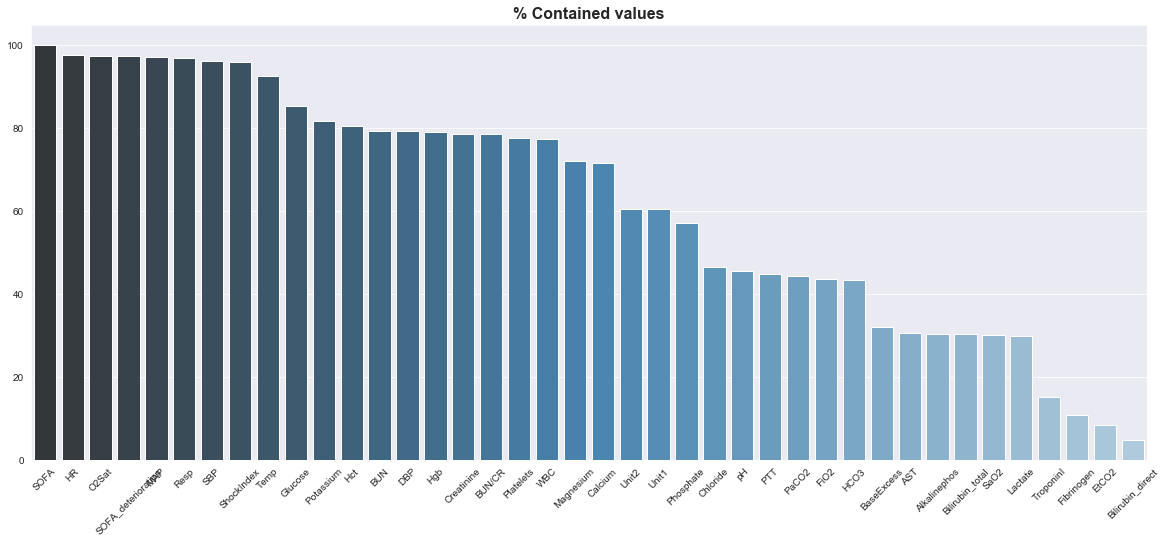

In [11]:
s_out = missing_values_barplot(df_munged.drop(stationary_vars, axis=1), missing=False, return_vals=True)

# Plotting sepsis ratios

# Plot some vals

In [20]:
df.loc[1].columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'hospital'],
      dtype='object')

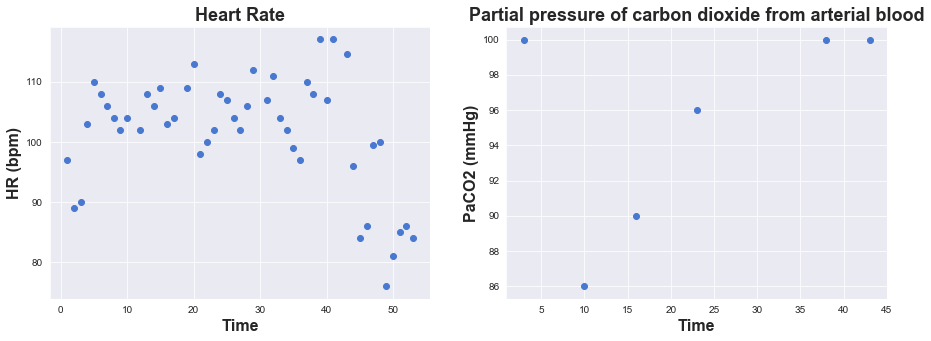

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Get person and time
person = df.loc[1]
tt = range(person.shape[0])

# Plot HR and 
ax[0].scatter(tt, person['HR'])
ax[1].scatter(tt, person['PaCO2'])

# Plot info
ax[0].set_title('Heart Rate', fontsize=18, fontweight='bold')
ax[1].set_title('Partial pressure of carbon dioxide from arterial blood', fontsize=18, fontweight='bold')
ax[0].set_xlabel('Time', fontsize=16), ax[1].set_xlabel('Time', fontsize=16)
ax[0].set_ylabel('HR (bpm)', fontsize=16), ax[1].set_ylabel('PaCO2 (mmHg)', fontsize=16)

plt.savefig('./figures/example_data.png', dpi=300, bbox_inches='tight')

# Number of variables that contain more than one entry per id

In [6]:
# Gives the number of filled entries per patient
num_filled = load_pickle(ROOT_DIR + '/data/processed/transforms/num_filled_entries.pickle')

In [7]:
# Suppose we consider ids for t > 40 as there will be more information
ids = df_munged.query('time > 40').index.get_level_values('id').unique()

**FiO2, pH, PaCO2, BUN, Glucose, Potassium, Hct, Hgb, WBC, Platelets have > 3 entries on average, they will potentially make candidates for signature features when they exist**

In [8]:
num_filled.loc[ids].mean()

HR                  50.059595
O2Sat               48.381826
Temp                18.767962
SBP                 47.366373
MAP                 48.778674
DBP                 39.067660
Resp                46.979437
EtCO2                2.659299
BaseExcess           3.087238
HCO3                 2.294835
FiO2                 5.105830
pH                   3.946192
PaCO2                3.222373
SaO2                 1.932279
AST                  0.890168
BUN                  3.717601
Alkalinephos         0.884073
Calcium              3.287447
Chloride             2.489318
Creatinine           3.304316
Bilirubin_direct     0.113526
Glucose              9.456073
Lactate              1.600012
Magnesium            3.514006
Phosphate            2.261774
Potassium            5.128055
Bilirubin_total      0.814443
TroponinI            0.448070
Hct                  4.766053
Hgb                  4.024934
PTT                  1.647048
WBC                  3.465616
Fibrinogen           0.393954
Platelets 

In [9]:
num_filled.loc[ids].std()

HR                  25.939678
O2Sat               26.057156
Temp                15.626872
SBP                 26.182222
MAP                 26.021371
DBP                 30.042310
Resp                25.382644
EtCO2               12.757300
BaseExcess           6.146216
HCO3                 3.401516
FiO2                 8.873258
pH                   6.578160
PaCO2                5.289587
SaO2                 4.243043
AST                  1.727817
BUN                  3.064022
Alkalinephos         1.735366
Calcium              3.159189
Chloride             3.646885
Creatinine           2.341421
Bilirubin_direct     0.543664
Glucose              9.884699
Lactate              3.578730
Magnesium            3.190457
Phosphate            2.350321
Potassium            4.698912
Bilirubin_total      1.524191
TroponinI            1.218140
Hct                  4.307842
Hgb                  3.388658
PTT                  2.551833
WBC                  2.816927
Fibrinogen           1.605466
Platelets 

# Number of people at a given time

In [ ]:
fig, ax = plt.subplots(figsize=(13, 10))
a = pd.Series(df.index.get_level_values('time')).value_counts().sort_index()
tt, yy = list(a.index), a.values
ax.plot(tt, yy)
plt.savefig('./figures/decomission_rate.')

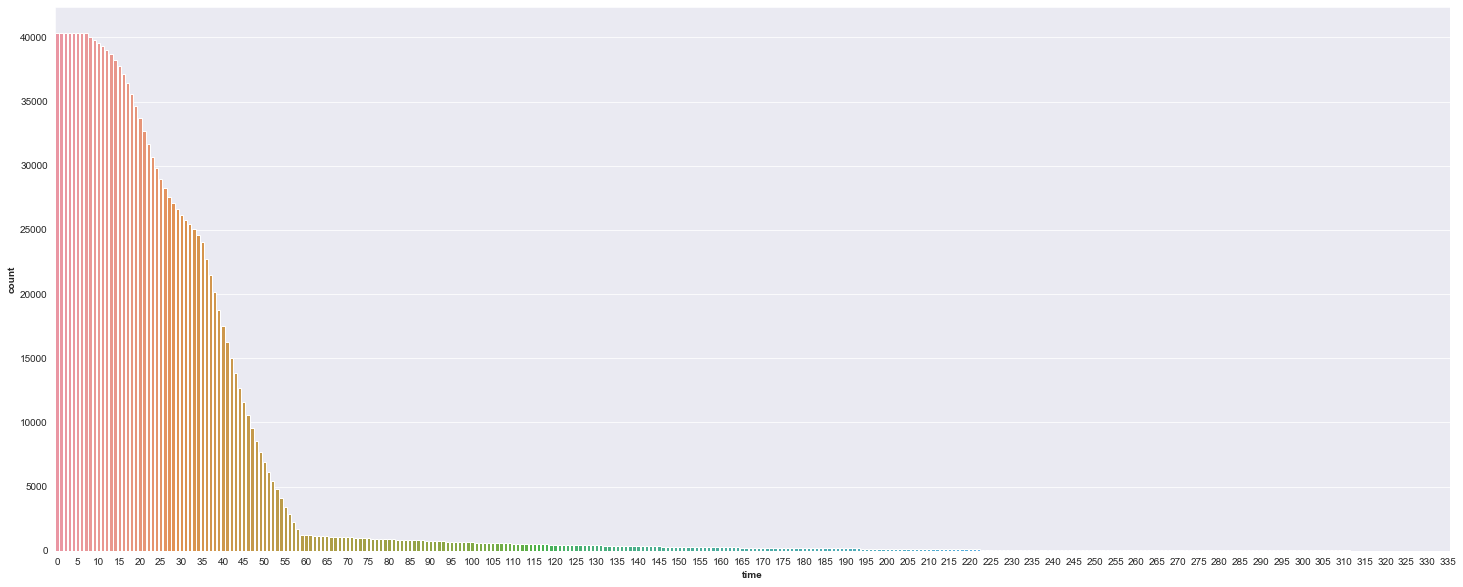

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(25, 10))
sns.countplot(df.index.get_level_values('time'))
remove_plot_ticks(ax, n=5)

# Do Lab Measured Values Serve as an Indicator

In [11]:
labels = load_pickle(ROOT_DIR + '/data/processed/labels/original.pickle')
ids_eventual = load_pickle(ROOT_DIR + '/data/processed/labels/ids_eventual.pickle')

In [12]:
def check_if_measurement_indicates_sepsis(s, print_info=False):
    """ Checks if a given lab measurement being measured is an indicator of sepsis. """
    # Get the septic ids
    ids_eventual = load_pickle(ROOT_DIR + '/data/processed/labels/ids_eventual.pickle')
    
    # Get ids of those that have the value measured
    ids_measured = s[s > 0].index.get_level_values('id').unique()
    ids_measured_septic = [x for x in ids_measured if x in ids_eventual]
    
    # Get those without a measurement
    ids_not_measured = [x for x in s.index.get_level_values('id').unique() if x not in ids_measured]
    ids_not_measured_septic = [x for x in ids_not_measured if x in ids_eventual]
    
    # Print info if specified
    measured_pcnt = len(ids_measured_septic) / len(ids_measured)
    not_measured_pcnt = len(ids_not_measured_septic) / len(ids_not_measured)
    if print_info:
        print('If {} was measured: {:.3f}% septic. Num cases = {}.'.format(s.name, measured_pcnt * 100, len(ids_measured)))
        print('If {} was not measured: {:.3f}% septic. Num cases = {}.'.format(s.name, not_measured_pcnt * 100, len(ids_not_measured)))
        
    return measured_pcnt, not_measured_pcnt

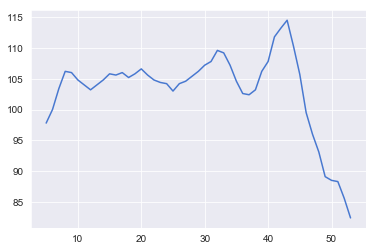

In [13]:
plt.plot(df_munged['HR'].loc[1].rolling(5).mean())

In [15]:
for x in df.columns[7:-7]:
    check_if_measurement_indicates_sepsis(df[x], print_info=True)
    print('')

If EtCO2 was measured: 16.356% septic. Num cases = 3216.
If EtCO2 was not measured: 6.468% septic. Num cases = 37120.

If BaseExcess was measured: 13.097% septic. Num cases = 7040.
If BaseExcess was not measured: 6.022% septic. Num cases = 33296.

If HCO3 was measured: 8.607% septic. Num cases = 20217.
If HCO3 was not measured: 5.900% septic. Num cases = 20119.

If FiO2 was measured: 12.327% septic. Num cases = 17807.
If FiO2 was not measured: 3.249% septic. Num cases = 22529.

If pH was measured: 11.740% septic. Num cases = 18935.
If pH was not measured: 3.290% septic. Num cases = 21401.

If PaCO2 was measured: 11.974% septic. Num cases = 18356.
If PaCO2 was not measured: 3.317% septic. Num cases = 21980.

If SaO2 was measured: 11.469% septic. Num cases = 13088.
If SaO2 was not measured: 5.233% septic. Num cases = 27248.

If AST was measured: 11.312% septic. Num cases = 14357.
If AST was not measured: 5.016% septic. Num cases = 25979.

If BUN was measured: 7.140% septic. Num cases = 3

# Respiration value at sepsis compared to early

In [16]:
# Get eventual sepsis
df_reset = df.reset_index()
df_eventual = df_reset[df_reset['id'].isin(ids_eventual)]

# Eventual labels
labels_reset = labels.reset_index()
labels_eventual = labels_reset[labels_reset['id'].isin(ids_eventual)]

In [17]:
df_eventual['S/F'] = df_eventual['SaO2'].values / df_eventual['FiO2'].values

/Users/jambo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/Users/jambo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
df_eventual['S/F'] = df_eventual['S/F'].fillna(method='ffill').fillna(method='bfill')

/Users/jambo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
col = 'Temp'

In [22]:
non_sepsis_mean = df_eventual[col][labels_eventual['SepsisLabel'] == 0].mean()
sepsis_mean = df_eventual[col][labels_eventual['SepsisLabel'] == 1].mean()
print('Mean {} away from sepsis {:.3f}'.format(col, non_sepsis_mean))
print('Mean {} at sepsis {:.3f}'.format(col, sepsis_mean))

Mean Temp away from sepsis 37.077
Mean Temp at sepsis 37.251


In [23]:
sepsis_mean = df_reset[col][df_reset['id'].isin(ids_eventual)].mean()
non_sepsis_mean = df_reset[col][~df_reset['id'].isin(ids_eventual)].mean()
print('Mean {} for non-septic patients {:.3f}'.format(col, non_sepsis_mean))
print('Mean {} for septic patients {:.3f}'.format(col, sepsis_mean))

Mean Temp for non-septic patients 36.961
Mean Temp for septic patients 37.104


In [20]:
df_reset['HR'][(labels == 1).values].mean()

NameError: name 'df_reset' is not defined

In [114]:
sepsis_mean = df_eventual['Resp'][labels_eventual['SepsisLabel'] == 1].mean()

In [116]:
sepsis_mean

20.459677082026186

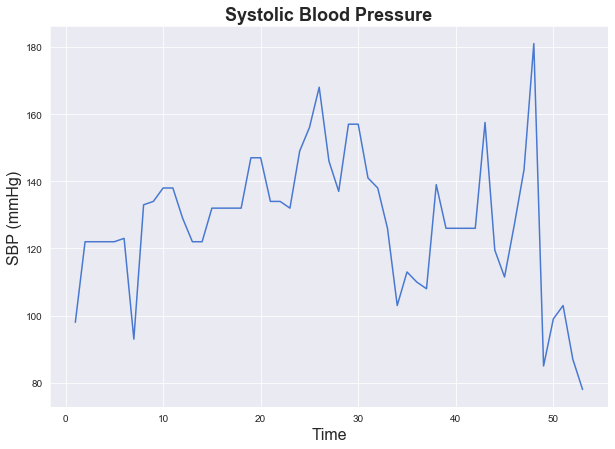

In [71]:
fig, ax = plt.subplots(figsize=(10, 7))
ax.plot(df_munged.loc[1]['SBP'])
ax.set_title('Systolic Blood Pressure', fontsize=18, fontweight='bold')
ax.set_xlabel('Time', fontsize=16, fontweight='normal')
ax.set_ylabel('SBP (mmHg)', fontsize=16, fontweight='normal')
plt.savefig('./figures/SBP.png', dpi=300, bbox_inches='tight')